Shortest path from A to R: ['A', 'T', 'S', 'R']


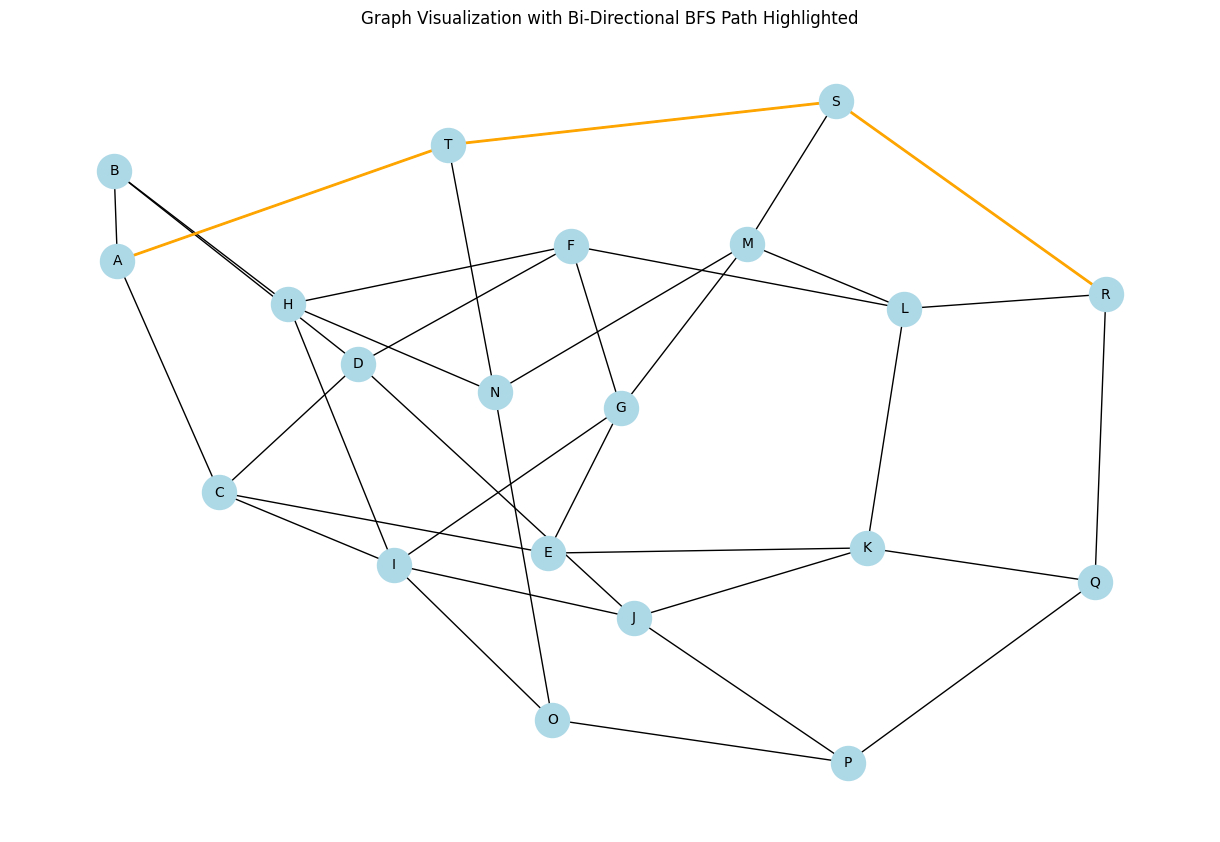

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import threading

def parallel_bi_directional_bfs(graph, start, end):
    if start == end:
        return [start]

    queue_start = deque([start])
    queue_end = deque([end])
    visited_start = {start}
    visited_end = {end}
    parent_start = {start: None}
    parent_end = {end: None}
    meeting_point = [None]
    lock = threading.Lock()

    def bfs_from_start():
        while queue_start:
            current = queue_start.popleft()
            for neighbor in graph[current]:
                with lock:
                    if neighbor not in visited_start:
                        visited_start.add(neighbor)
                        parent_start[neighbor] = current
                        queue_start.append(neighbor)
                        if neighbor in visited_end:
                            meeting_point[0] = neighbor
                            return

    def bfs_from_end():
        while queue_end:
            current = queue_end.popleft()
            for neighbor in graph[current]:
                with lock:
                    if neighbor not in visited_end:
                        visited_end.add(neighbor)
                        parent_end[neighbor] = current
                        queue_end.append(neighbor)
                        if neighbor in visited_start:
                            meeting_point[0] = neighbor
                            return

    # Create and start threads
    thread_start = threading.Thread(target=bfs_from_start)
    thread_end = threading.Thread(target=bfs_from_end)
    thread_start.start()
    thread_end.start()

    # Wait for threads to finish
    thread_start.join()
    thread_end.join()

    if meeting_point[0] is not None:
        return reconstruct_path(parent_start, parent_end, meeting_point[0])
    return "No path found"

def reconstruct_path(parent_start, parent_end, meeting_point):
    path_start = []
    current = meeting_point
    while current is not None:
        path_start.append(current)
        current = parent_start[current]
    path_start.reverse()

    path_end = []
    current = parent_end[meeting_point]
    while current is not None:
        path_end.append(current)
        current = parent_end[current]

    return path_start + path_end

def create_complex_graph():
    G = nx.Graph()
    edges = [
        ('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'),
        ('C', 'E'), ('D', 'F'), ('E', 'G'), ('F', 'G'),
        ('F', 'H'), ('G', 'I'), ('H', 'I'), ('I', 'J'),
        ('J', 'K'), ('K', 'L'), ('L', 'M'), ('M', 'N'),
        ('N', 'O'), ('O', 'P'), ('P', 'Q'), ('Q', 'R'),
        ('R', 'S'), ('S', 'T'), ('T', 'A'), ('B', 'H'),
        ('C', 'I'), ('D', 'J'), ('E', 'K'), ('F', 'L'),
        ('G', 'M'), ('H', 'N'), ('I', 'O'), ('J', 'P'),
        ('K', 'Q'), ('L', 'R'), ('M', 'S'), ('N', 'T')
    ]
    G.add_edges_from(edges)
    return G

def visualize_graph(graph, path=None):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=600, font_size=10)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='orange', width=2)

    plt.title("Graph Visualization with Bi-Directional BFS Path Highlighted")
    plt.show()

if __name__ == "__main__":
    complex_graph = create_complex_graph()
    start_node = 'A'
    end_node = 'R'

    shortest_path = parallel_bi_directional_bfs(complex_graph, start_node, end_node)
    print(f"Shortest path from {start_node} to {end_node}: {shortest_path}")

    visualize_graph(complex_graph, shortest_path)
